
<div style="text-align: left; background-color:#CFD9F1; font-family: Trebuchet MS; color:#0A3399; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">Data Science Job Salaries </div>
<div style="text-align: left; background-color:#FFF0F5; font-family: Monaco; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">🌎 
Welcome to my project🌎</div>

<a id="3"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">3. Import Libraries 📚</div> 

### 1. Import Libraries 📚

In [58]:
#install 
!pip install country_converter
!pip install WordCloud
!pip install pycountry



# data
import pandas as pd
import numpy as np
import country_converter as coco
import pycountry



# visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os
from wordcloud import WordCloud

# import warnings
# warnings.filterwarnings("ignore")

### 2. Read and Explain Dataset 🧾

In [59]:
#Read data
DATA_PATH='/mnt/3d37937b-ae66-4b53-9163-f354a1f3e7bc/Epsilon Ai sessions for data scenice/Data Science/Eslion Projects/data_sets/ds_salaries.csv'
df=pd.read_csv(DATA_PATH, index_col=0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### 3.Data Information

<div style="border-radius:10px;
            border :#0A0104 solid;
            padding: 15px;
            background-color:'grey' ;
            color:'white';
            font-size:110%;
            text-align: left">
    
1. **work_year**: The year the salary was paid

2. **experience_level**: The experience level in the job during the year with the following possible values:
    - EN = Entry-level / Junior;
    - MI = Mid-level / Intermediate;
    - SE = Senior-level / Expert;
    - EX = Executive-level / Director

3. **employment_type**: The type of employement for the role:
    - PT = Part-time;
    - FT = Full-time;
    - CT = Contract;
    - FL = Freelance;

4. **job_title**: The role worked in during the year.

5. **salary**: The total gross salary amount paid.

6. **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.

7. **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

8. **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code(Alpha-2 code).
 
9. **remote_ratio**: The overall amount of work done remotely, possible values are as follows:
    - 0 = No remote work (less than 20%);
    - 50 = Partially remote;
    - 100 = Fully remote (more than 80%)

10. **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code(Alpha-2 code).

11. **company_size**: The average number of people that worked for the company during the year:
    - S = less than 50 employees (small);
    - M = 50 to 250 employees (medium);
    - L = more than 250 employees (large)

## 4. Data Preprocessing 🛠

In [60]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
251,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S
413,2022,MI,FT,Data Engineer,45000,EUR,49461,GR,100,GR,M
495,2022,MI,FT,Machine Learning Scientist,153000,USD,153000,US,50,US,M
469,2022,SE,FT,Data Scientist,140000,USD,140000,US,100,US,M
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M


#### Replacing some of the values to understand the graphs clearly

In [61]:
df['remote_ratio'].value_counts()

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [62]:
# Remote_ratio
df['remote_ratio'].replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)
df['remote_ratio'].head()

0             On-site
1             On-site
2    Partially Remote
3             On-site
4    Partially Remote
Name: remote_ratio, dtype: object

In [63]:
# Experience Level
df['experience_level'].replace(['EN','MI','SE','EX'],['Entry','Mid','Senior','Executive'],inplace=True)
df['experience_level'].head()

0       Mid
1    Senior
2    Senior
3       Mid
4    Senior
Name: experience_level, dtype: object

In [64]:

# Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}

df['employment_type'] = df['employment_type'].map(employment_type_dict)
df['employment_type'].head()

0    Full Time
1    Full Time
2    Full Time
3    Full Time
4    Full Time
Name: employment_type, dtype: object

In [65]:
# ISO
def get_countery_name(alph_2):
    return pycountry.countries.get(alpha_2=alph_2).name


df['employee_residence']=df['employee_residence'].apply(get_countery_name)
df['company_location']=df['company_location'].apply(get_countery_name)

In [66]:
#Company Size
company_size_dict={'S': 'Small',
                  'M':'Medium',
                  'L':'Large'}
df.company_size=df['company_size'].map(company_size_dict)

### 5. Exploratory Data Analysis 📊

In [67]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full Time,Data Scientist,70000,EUR,79833,Germany,On-site,Germany,Large
1,2020,Senior,Full Time,Machine Learning Scientist,260000,USD,260000,Japan,On-site,Japan,Small
2,2020,Senior,Full Time,Big Data Engineer,85000,GBP,109024,United Kingdom,Partially Remote,United Kingdom,Medium
3,2020,Mid,Full Time,Product Data Analyst,20000,USD,20000,Honduras,On-site,Honduras,Small
4,2020,Senior,Full Time,Machine Learning Engineer,150000,USD,150000,United States,Partially Remote,United States,Large


In [68]:
df.shape

(607, 11)

In [69]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,Senior,Full Time,Data Engineer,154000,USD,154000,United States,Fully Remote,United States,Medium
603,2022,Senior,Full Time,Data Engineer,126000,USD,126000,United States,Fully Remote,United States,Medium
604,2022,Senior,Full Time,Data Analyst,129000,USD,129000,United States,On-site,United States,Medium
605,2022,Senior,Full Time,Data Analyst,150000,USD,150000,United States,Fully Remote,United States,Medium
606,2022,Mid,Full Time,AI Scientist,200000,USD,200000,India,Fully Remote,United States,Large


In [70]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

In [71]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    object
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(3), object(8)
memory usage: 56.9+ KB


In [73]:
df.describe()

,work_year,salary,salary_in_usd
count,607.000000,6.070000e+02,607.000000
mean,2021.405272,3.240001e+05,112297.869852
std,0.692133,1.544357e+06,70957.259411
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,7.000000e+04,62726.000000
50%,2022.000000,1.150000e+05,101570.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


In [74]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [75]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [76]:
df.duplicated().sum()

42

In [77]:
numerical_cols=df.select_dtypes(include='number').columns.tolist()
df[numerical_cols].corr()

,work_year,salary,salary_in_usd
work_year,1.000000,-0.087577,0.170493
salary,-0.087577,1.000000,-0.083906
salary_in_usd,0.170493,-0.083906,1.000000


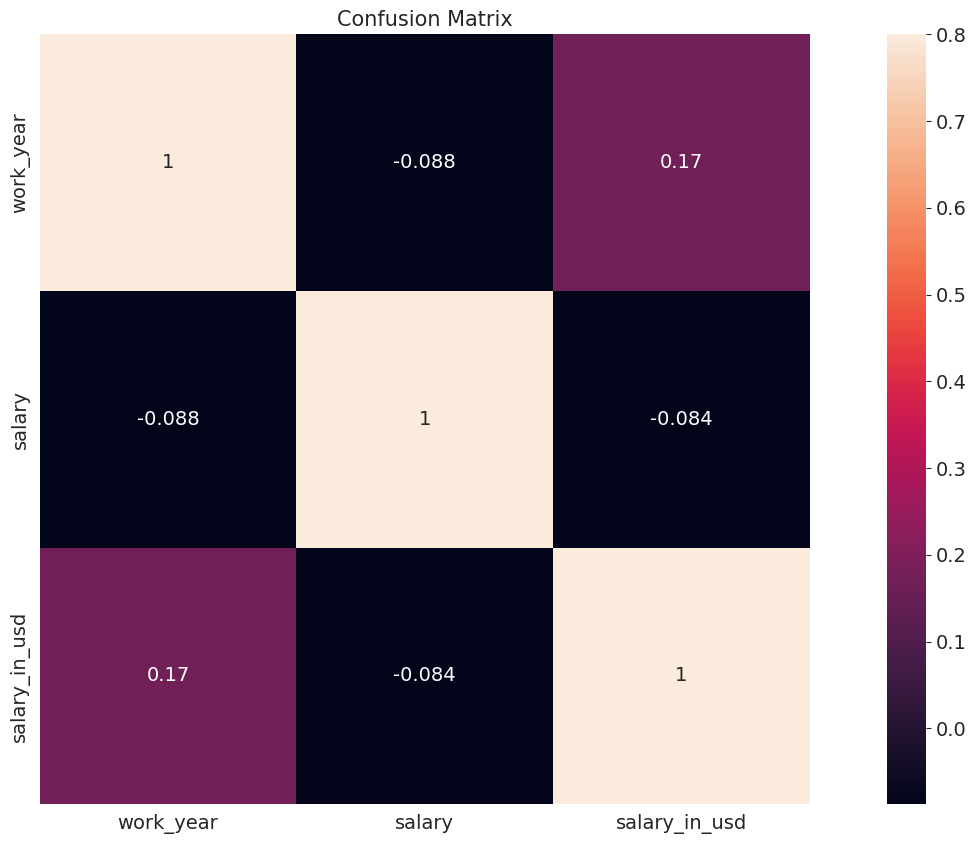

In [78]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[numerical_cols].corr(), vmax =.8, square = True, annot = True)
plt.title('Confusion Matrix',fontsize=15);

- 🎈 Observations: attributes don't seem to be correlated with each other

*Getting unique values of each category*

In [79]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:grey;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')
    

In [80]:
colums_name=df.columns.to_list()
nunique_df={var:pd.DataFrame(df[var].value_counts())
           for var in colums_name}

multi_table([nunique_df['work_year'],nunique_df['experience_level'],nunique_df['employment_type'],nunique_df['job_title'],nunique_df['employee_residence'],nunique_df['employment_type'],nunique_df['remote_ratio'],nunique_df['company_location'],nunique_df['company_size']])

,count
work_year,
2022,318
2021,217
2020,72
,count
experience_level,
Senior,280
Mid,213
Entry,88
Executive,26


#### Univarient Analysis

*Experience level*

In [81]:
df['experience_level'].unique()

array(['Mid', 'Senior', 'Entry', 'Executive'], dtype=object)

In [82]:
level_counts=df['experience_level'].value_counts()
level_counts

experience_level
Senior       280
Mid          213
Entry         88
Executive     26
Name: count, dtype: int64

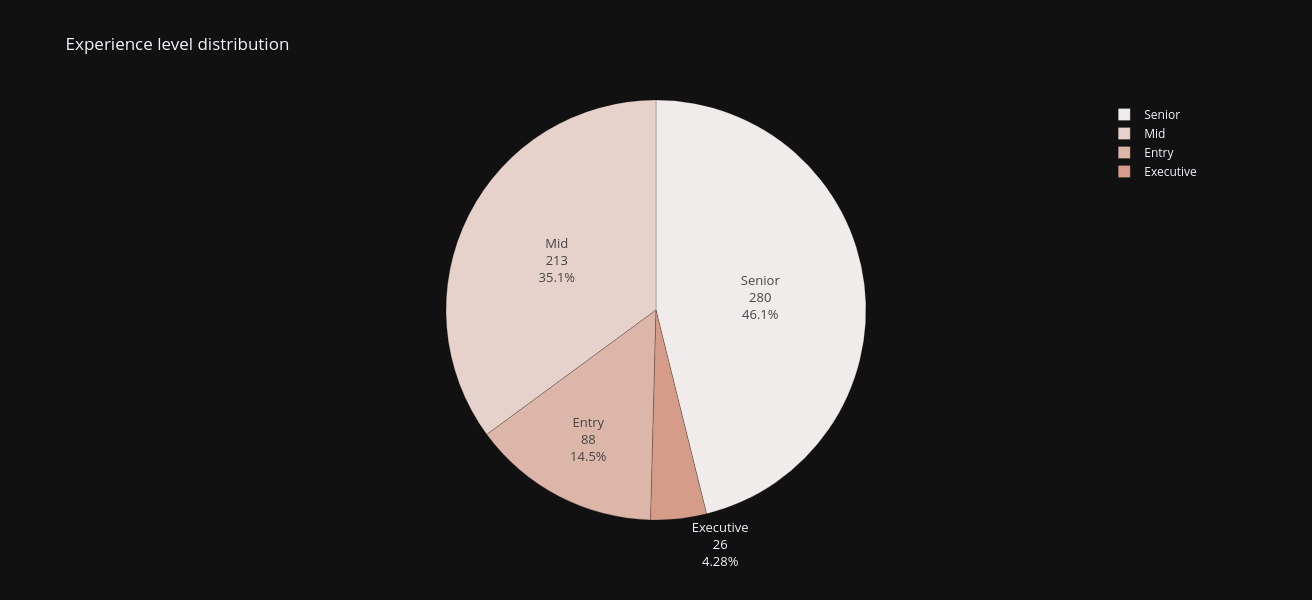

In [83]:

fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.amp,
          title= 'Experience level distribution',template='plotly_dark'
          )
# Set the width and height of the graph
fig.update_layout(
    width=800,  # Set the width of the graph in pixels
    height=600  # Set the height of the graph in pixels
)

fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.show()

*🎈 Observations: Most of the staff have senior working experience*

*Employment type*

In [84]:
df['employment_type']

0      Full Time
1      Full Time
2      Full Time
3      Full Time
4      Full Time
         ...    
602    Full Time
603    Full Time
604    Full Time
605    Full Time
606    Full Time
Name: employment_type, Length: 607, dtype: object

In [85]:
df['employment_type'].unique()

array(['Full Time', 'Contract', 'Part Time', 'Freelance'], dtype=object)

In [86]:
df['employment_type'].value_counts()

employment_type
Full Time    588
Part Time     10
Contract       5
Freelance      4
Name: count, dtype: int64

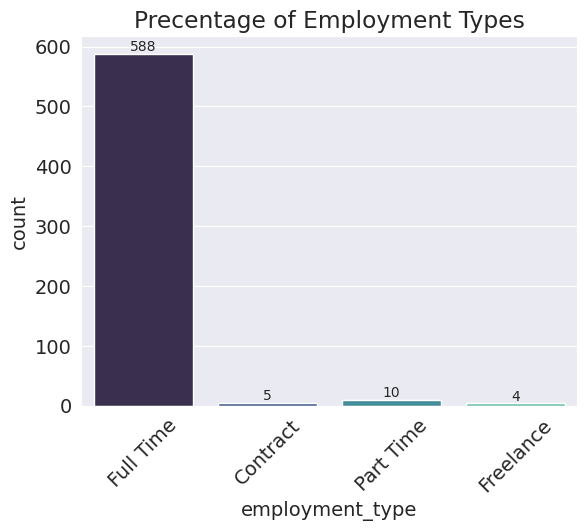

In [87]:
c1=sns.countplot(data=df,x='employment_type',palette="mako")
plt.xticks(rotation=45)
c1.bar_label(c1.containers[0],size = 10)
plt.title("Precentage of Employment Types")
plt.show()

*🎈 Observations: Most of the staff have senior working experience*

*Job title*

In [88]:
df['job_title']

0                  Data Scientist
1      Machine Learning Scientist
2               Big Data Engineer
3            Product Data Analyst
4       Machine Learning Engineer
                  ...            
602                 Data Engineer
603                 Data Engineer
604                  Data Analyst
605                  Data Analyst
606                  AI Scientist
Name: job_title, Length: 607, dtype: object

In [89]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [90]:
job_counts=df['job_title'].value_counts()
job_counts

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

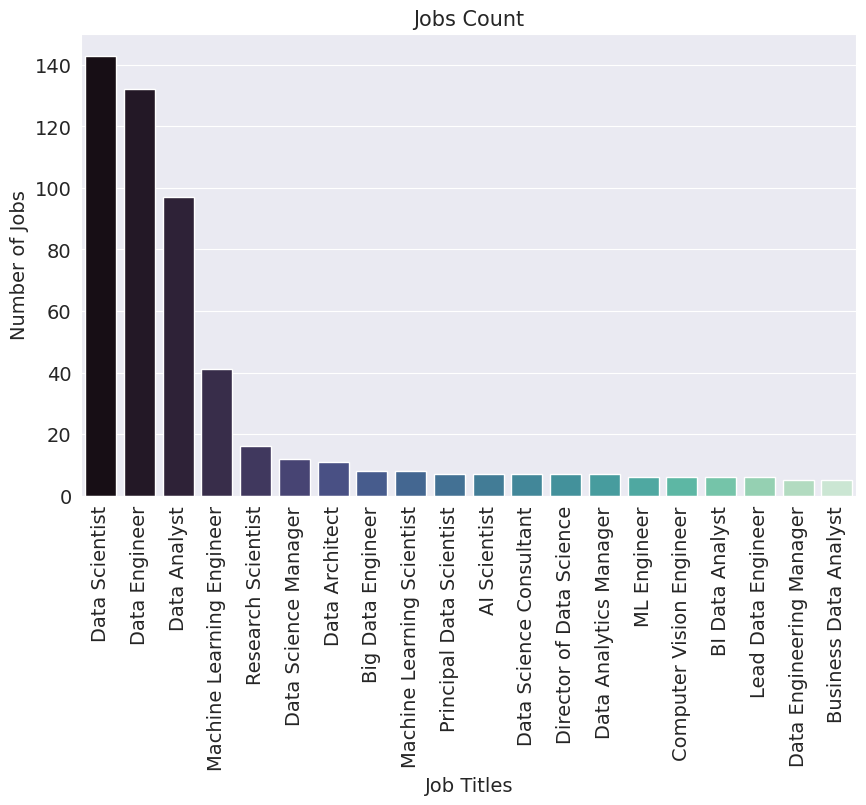

In [91]:
job_counts=job_counts.head(20)
plt.figure(figsize=(10,6))
plt.tight_layout(pad=3)
plt.title("Jobs Count",fontsize=15)
sns.set_style("darkgrid")
a=sns.barplot(x=job_counts.index,y=job_counts,palette="mako")
a.set_xticklabels(job_counts.index ,rotation=90)
a.set(xlabel='Job Titles', ylabel='Number of Jobs')
plt.show()

*🎈 Observations: Employees with title 'Data Scientist' is highest.*

*Company size*

In [92]:
df['company_size']

0       Large
1       Small
2      Medium
3       Small
4       Large
        ...  
602    Medium
603    Medium
604    Medium
605    Medium
606     Large
Name: company_size, Length: 607, dtype: object

In [93]:
df['company_size'].unique()

array(['Large', 'Small', 'Medium'], dtype=object)

In [94]:
company_size_counts=df['company_size'].value_counts()
company_size_counts

company_size
Medium    326
Large     198
Small      83
Name: count, dtype: int64

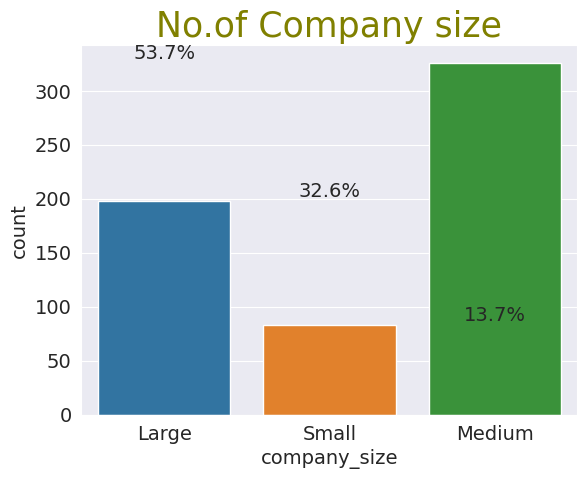

In [95]:
sns.countplot(df,x='company_size')
plt.title('No.of Company size',size=25,color='olive')
sns.set_style("darkgrid")

# Add text annotations for percentage of counts
for i, count in enumerate(company_size_counts):
    percentage = (count / df.shape[0]) * 100
    plt.annotate(f'{percentage:.1f}%', (i, count), ha='center', va='bottom')
    
plt.show()

*🎈 Observations:The Midium size are most frequency.*

*Remote ratio*

In [96]:
df['remote_ratio']

0               On-site
1               On-site
2      Partially Remote
3               On-site
4      Partially Remote
             ...       
602        Fully Remote
603        Fully Remote
604             On-site
605        Fully Remote
606        Fully Remote
Name: remote_ratio, Length: 607, dtype: object

In [97]:
df['remote_ratio'].unique()

array(['On-site', 'Partially Remote', 'Fully Remote'], dtype=object)

In [98]:
df['remote_ratio'].value_counts()

remote_ratio
Fully Remote        381
On-site             127
Partially Remote     99
Name: count, dtype: int64

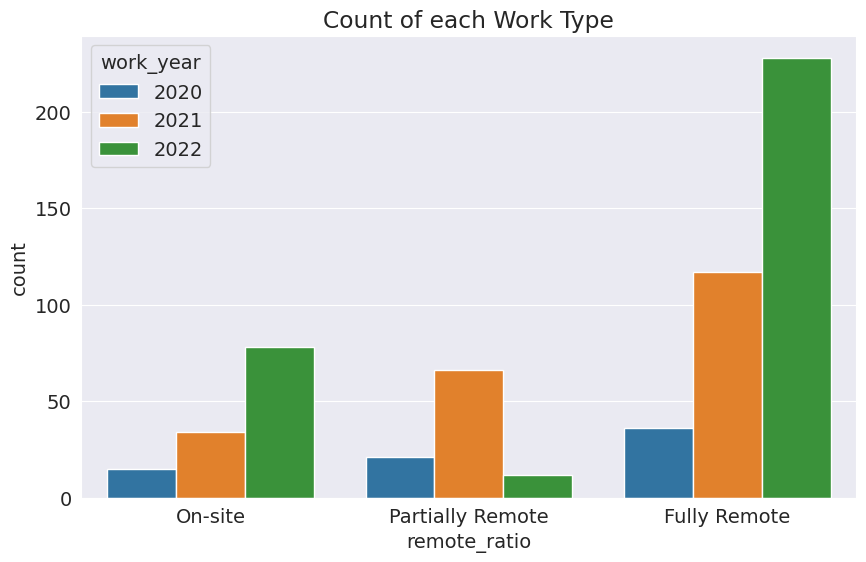

In [99]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='remote_ratio',hue='work_year')
plt.title('Count of each Work Type')
plt.show()

*🎈 Observations: For each year(2020,2021,2022), the count for work type-remote is high.The number of remote working is huge. The cause is most likely due to the impact of the COVID-19 epidemic, changing the working trend.*

*Employee residence*

In [100]:
df['employee_residence']

0             Germany
1               Japan
2      United Kingdom
3            Honduras
4       United States
            ...      
602     United States
603     United States
604     United States
605     United States
606             India
Name: employee_residence, Length: 607, dtype: object

In [101]:
df['employee_residence'].unique()

array(['Germany', 'Japan', 'United Kingdom', 'Honduras', 'United States',
       'Hungary', 'New Zealand', 'France', 'India', 'Pakistan', 'Poland',
       'Portugal', 'China', 'Greece', 'United Arab Emirates',
       'Netherlands', 'Mexico', 'Canada', 'Austria', 'Nigeria',
       'Philippines', 'Spain', 'Denmark', 'Russian Federation', 'Italy',
       'Croatia', 'Bulgaria', 'Singapore', 'Brazil', 'Iraq', 'Viet Nam',
       'Belgium', 'Ukraine', 'Malta', 'Chile', 'Romania',
       'Iran, Islamic Republic of', 'Colombia', 'Moldova, Republic of',
       'Kenya', 'Slovenia', 'Hong Kong', 'Turkey', 'Serbia',
       'Puerto Rico', 'Luxembourg', 'Jersey', 'Czechia', 'Argentina',
       'Algeria', 'Tunisia', 'Malaysia', 'Estonia', 'Australia',
       'Bolivia, Plurinational State of', 'Ireland', 'Switzerland'],
      dtype=object)

In [102]:
emp_res_count=df['employee_residence'].value_counts().head(10).to_frame()
emp_res_count

,count
employee_residence,
United States,332
United Kingdom,44
India,30
Canada,29
Germany,25
France,18
Spain,15
Greece,13
Japan,7


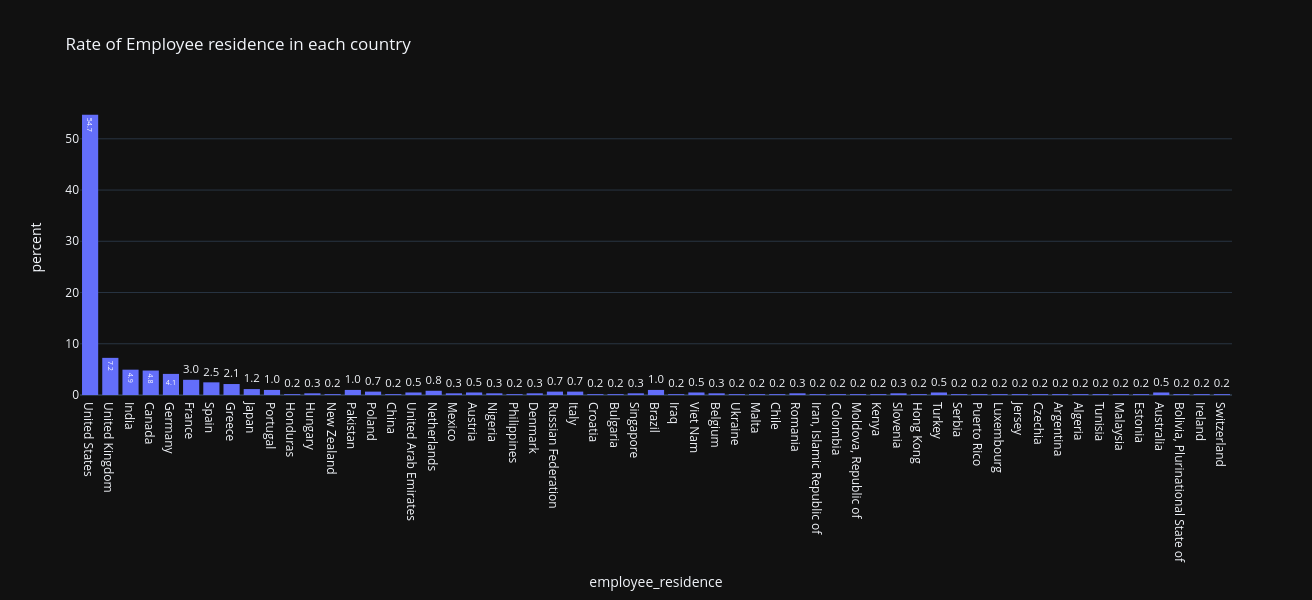

In [103]:
fig=px.histogram(df,
             x='employee_residence',
             histnorm='percent',
             text_auto='.1f',
             template='plotly_dark',
             title='Rate of Employee residence in each country',
             height=600,  # Set the height of the graph
             width=800 , # Set the width of the graph
            )
fig.update_xaxes(categoryorder='array', categoryarray=emp_res_count.index)
fig.show()

*🎈 Observations: Most of the empolyees(TOP 5) are from US, UK, India, Canada and Germany.*

*Company location*

In [104]:
df['company_location']

0             Germany
1               Japan
2      United Kingdom
3            Honduras
4       United States
            ...      
602     United States
603     United States
604     United States
605     United States
606     United States
Name: company_location, Length: 607, dtype: object

In [105]:
df['company_location'].unique()

array(['Germany', 'Japan', 'United Kingdom', 'Honduras', 'United States',
       'Hungary', 'New Zealand', 'France', 'India', 'Pakistan', 'China',
       'Greece', 'United Arab Emirates', 'Netherlands', 'Mexico',
       'Canada', 'Austria', 'Nigeria', 'Spain', 'Portugal', 'Denmark',
       'Italy', 'Croatia', 'Luxembourg', 'Poland', 'Singapore', 'Romania',
       'Iraq', 'Brazil', 'Belgium', 'Ukraine', 'Israel',
       'Russian Federation', 'Malta', 'Chile',
       'Iran, Islamic Republic of', 'Colombia', 'Moldova, Republic of',
       'Kenya', 'Slovenia', 'Switzerland', 'Viet Nam', 'American Samoa',
       'Turkey', 'Czechia', 'Algeria', 'Estonia', 'Malaysia', 'Australia',
       'Ireland'], dtype=object)

In [106]:
emp_res_count=df['company_location'].value_counts().head(10).to_frame()
emp_res_count

,count
company_location,
United States,355
United Kingdom,47
Canada,30
Germany,28
India,24
France,15
Spain,14
Greece,11
Japan,6


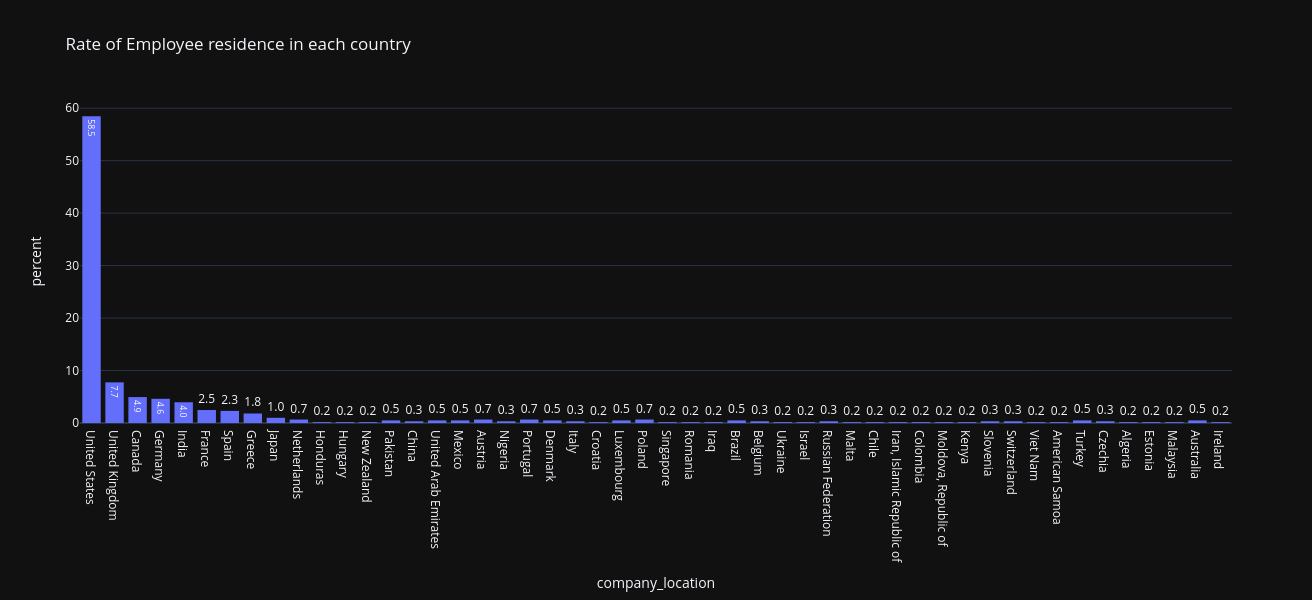

In [107]:
fig=px.histogram(df,
             x='company_location',
             histnorm='percent',
             text_auto='.1f',
             template='plotly_dark',
             title='Rate of Employee residence in each country',
             height=600,  # Set the height of the graph
             width=800 , # Set the width of the graph
            )
fig.update_xaxes(categoryorder='array', categoryarray=emp_res_count.index)
fig.show()

*🎈 Observations: Most of the countries(TOP 5) are located in US, UK, Canada, Germany and India.*

*Work year*

In [108]:
wkyear=df['work_year'].value_counts()
wkyear

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

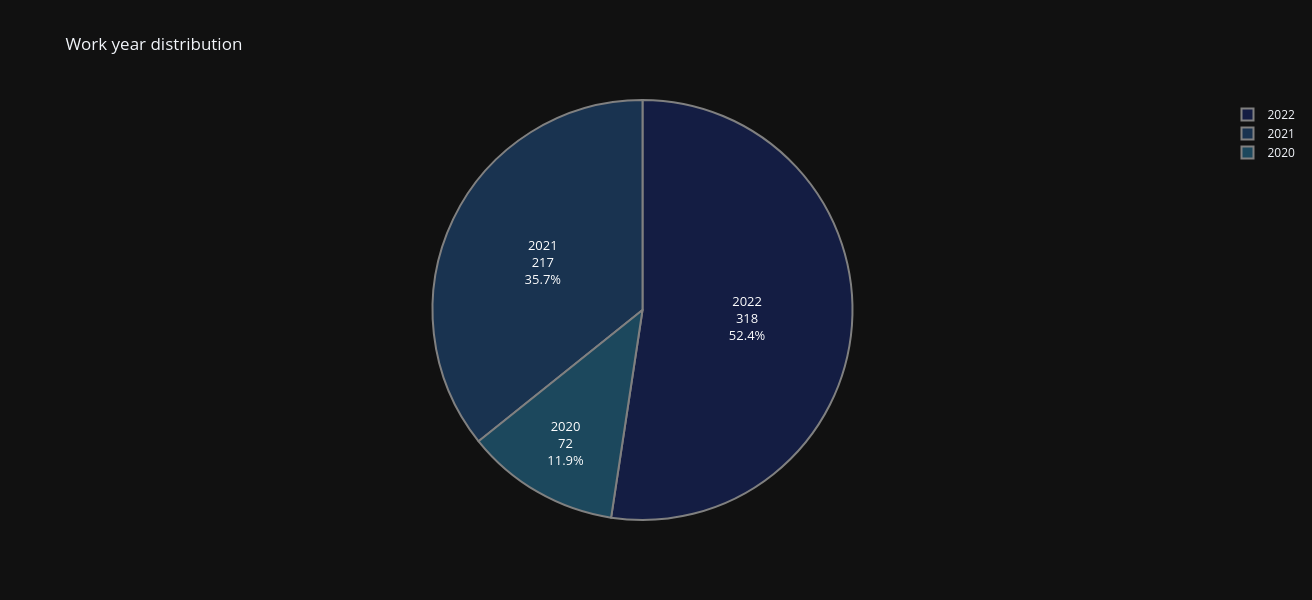

In [109]:
fig = px.pie(values=wkyear.values, 
             names=wkyear.index, 
             color_discrete_sequence=px.colors.sequential.tempo_r,
             title= 'Work year distribution',template='presentation')
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#100000', width=0.2)))

# Set the width and height of the graph
fig.update_layout(
    width=800,  # Set the width of the graph in pixels
    height=600  # Set the height of the graph in pixels
)
fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(template="plotly_dark" )
fig.show()

*🎈 Observations: This shows a positive trend and shows that data science jobs are becoming more valuable as the years pass.*

#### Multivarient Analysis

*Salary in USD based on company location*

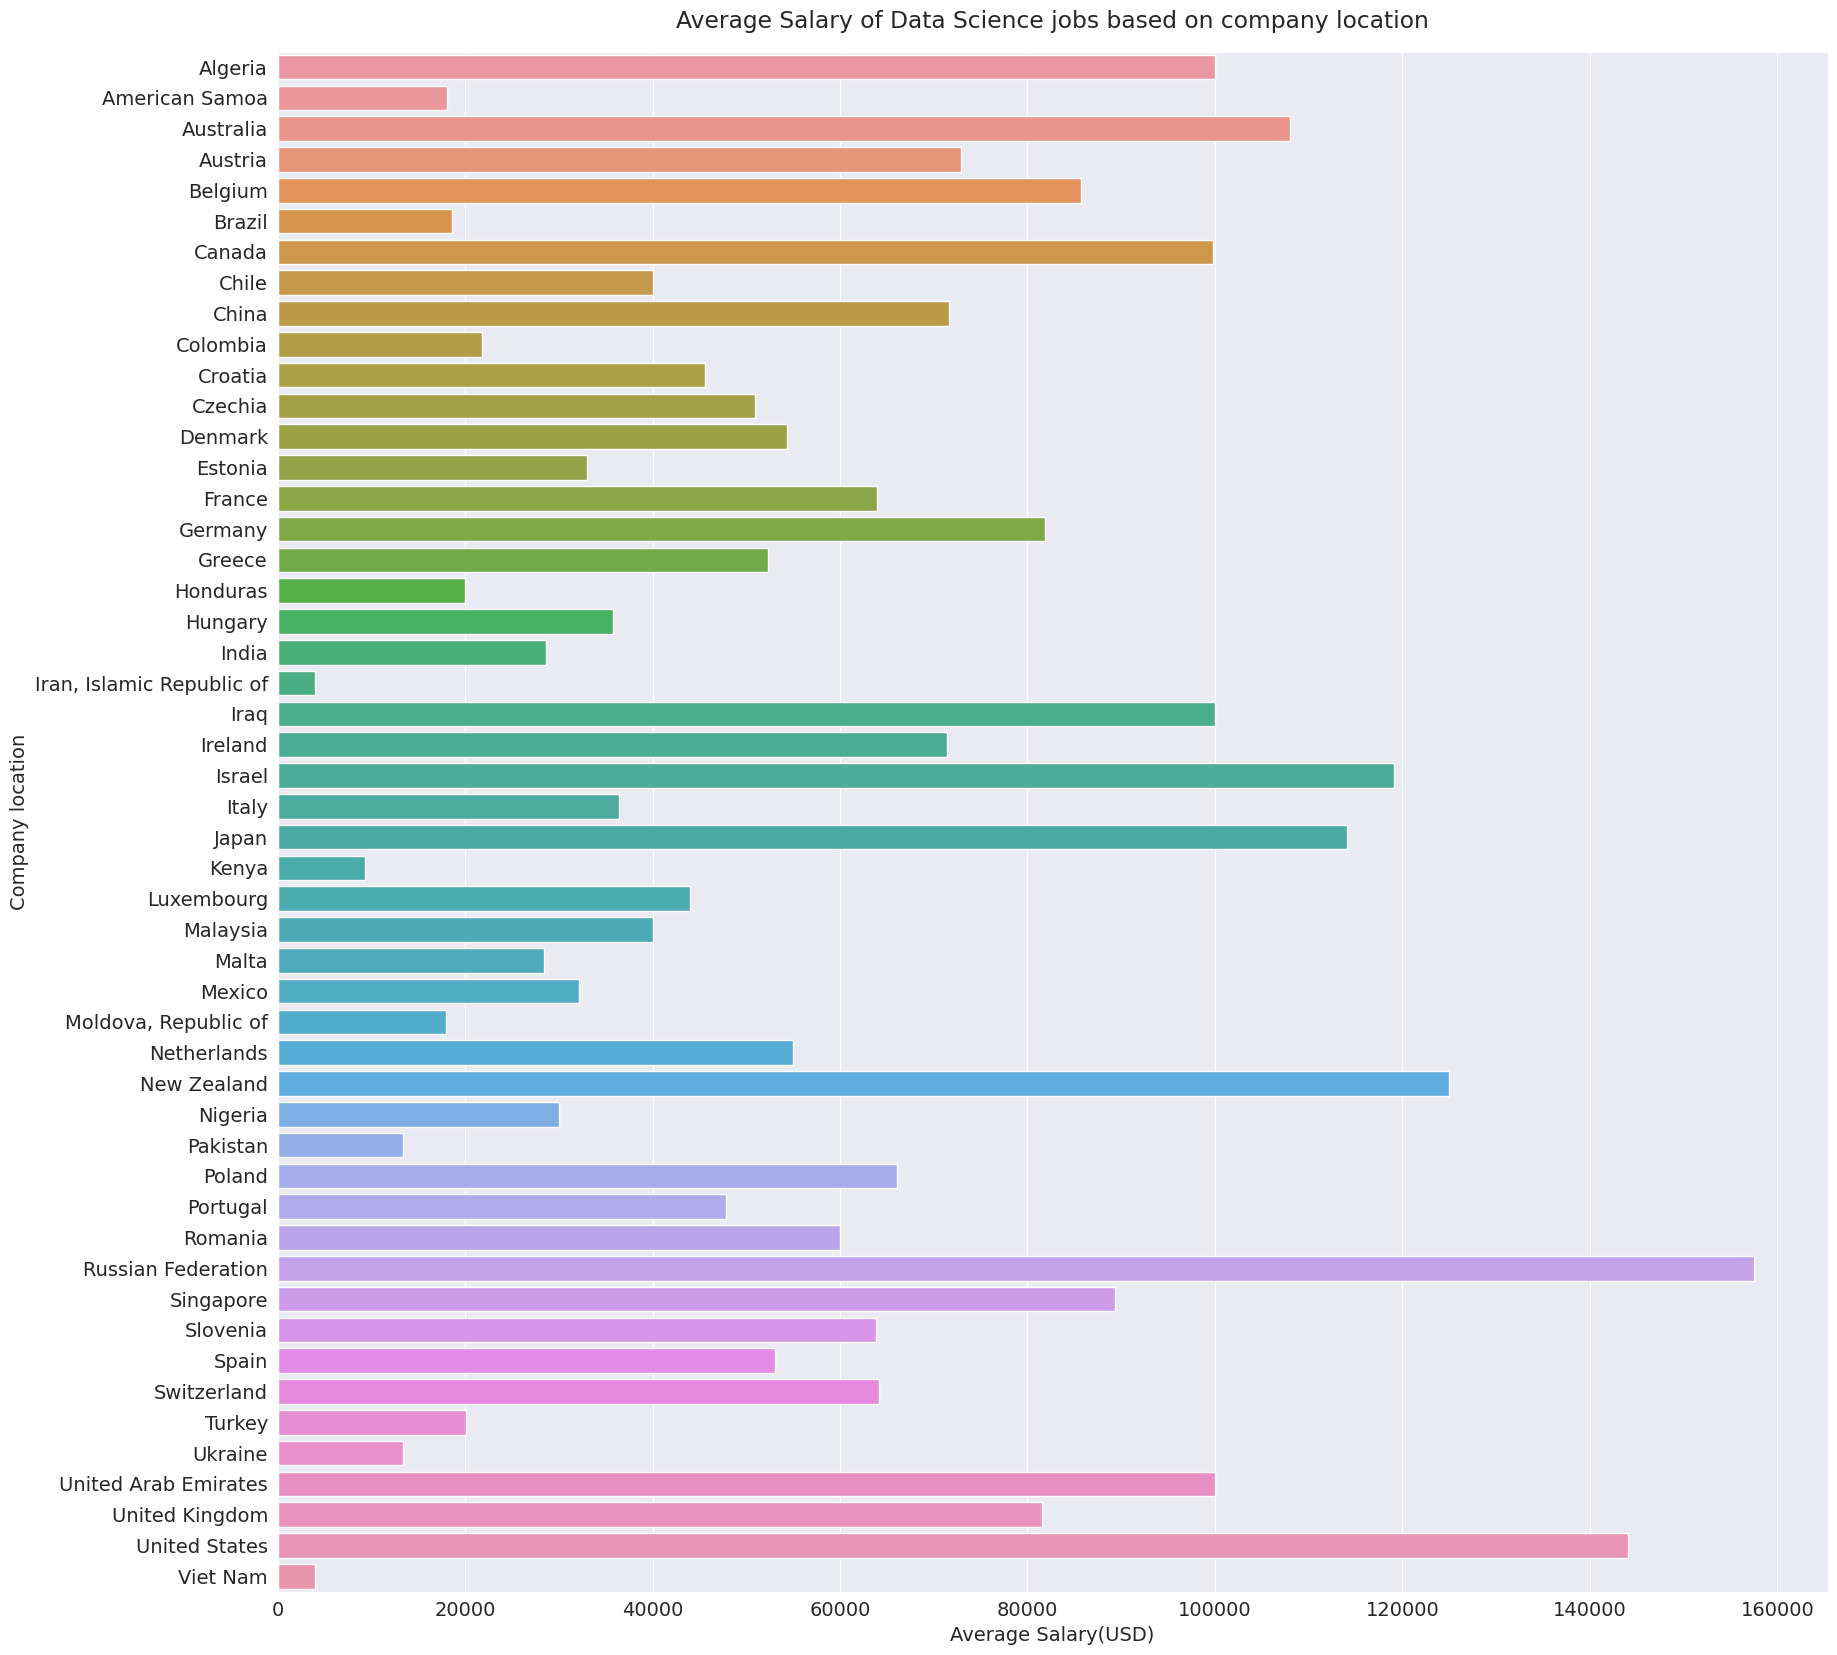

In [110]:
avg_sal_per_comp_location=df.groupby('company_location')['salary_in_usd'].mean()
plt.figure(figsize=(20,20))
sns.barplot(x=avg_sal_per_comp_location.values,y=avg_sal_per_comp_location.index)
plt.ylabel('Company location')
plt.xlabel('Average Salary(USD)')
plt.title('Average Salary of Data Science jobs based on company location', y=1.01);

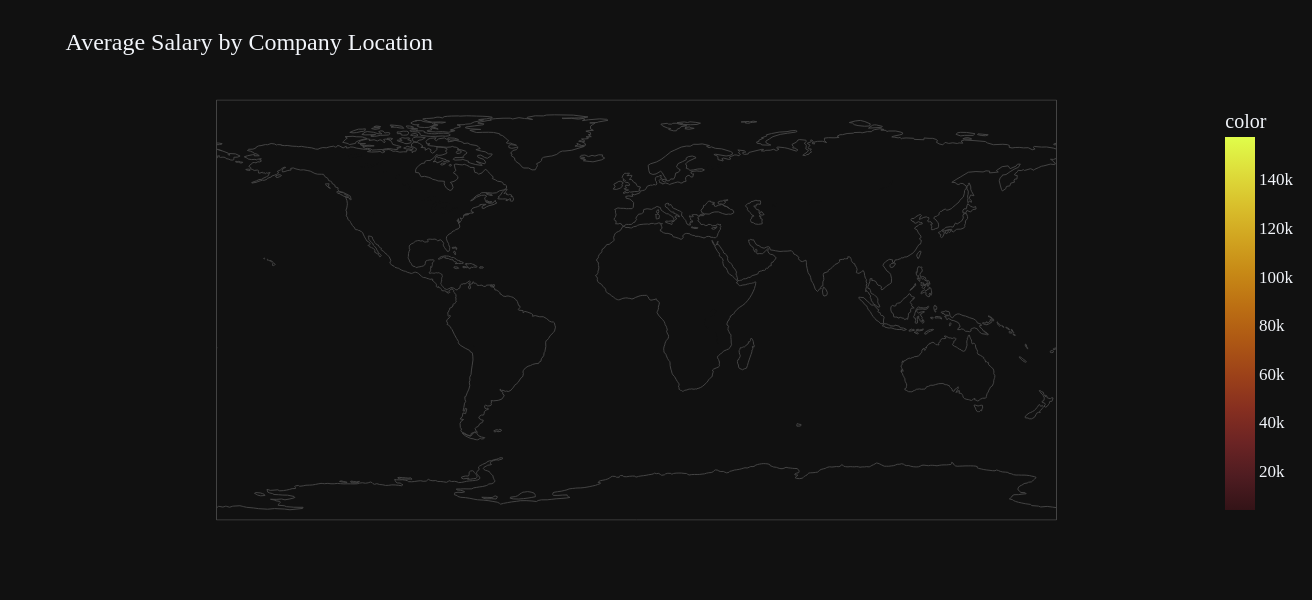

In [111]:
fig = px.choropleth(locations=avg_sal_per_comp_location.index,
                    color=avg_sal_per_comp_location.values,
                    color_continuous_scale=px.colors.sequential.solar,
                    template='plotly_dark',
                    title = 'Average Salary by Company Location')
fig.update_layout(font = dict(size=17,family="Franklin Gothic"),  width=800,   height=600 )
fig.show()

*Experience Level, Salary, and Company Size*

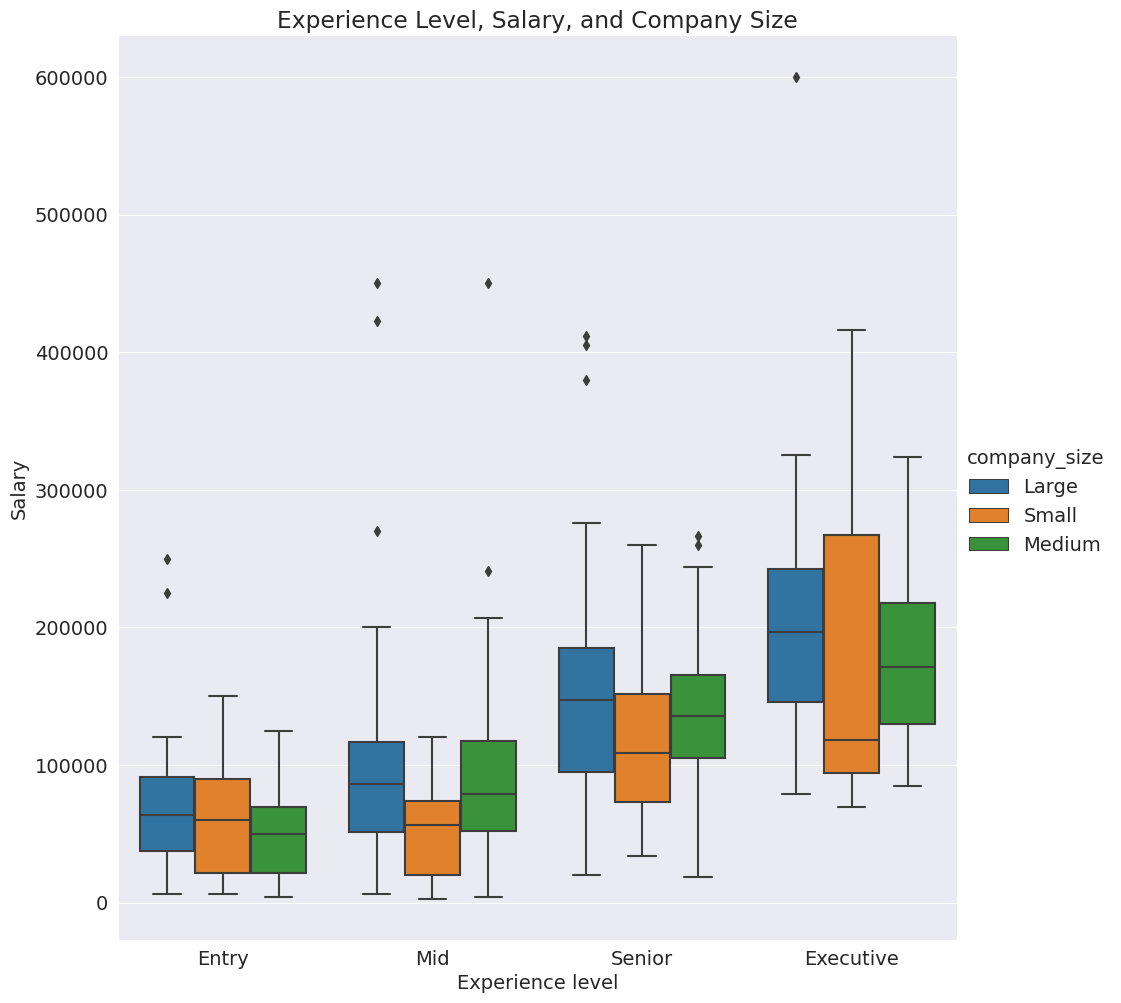

In [112]:
exp_order=['Entry','Mid','Senior','Executive']
sns.catplot(data=df,
           x='experience_level',
           y='salary_in_usd',
           order=exp_order,
           height=10,
           kind='box',
           hue='company_size')
plt.title('Experience Level, Salary, and Company Size')
plt.xlabel('Experience level')
plt.ylabel('Salary');

*Remote Ratio, Salary, and Employment Type*

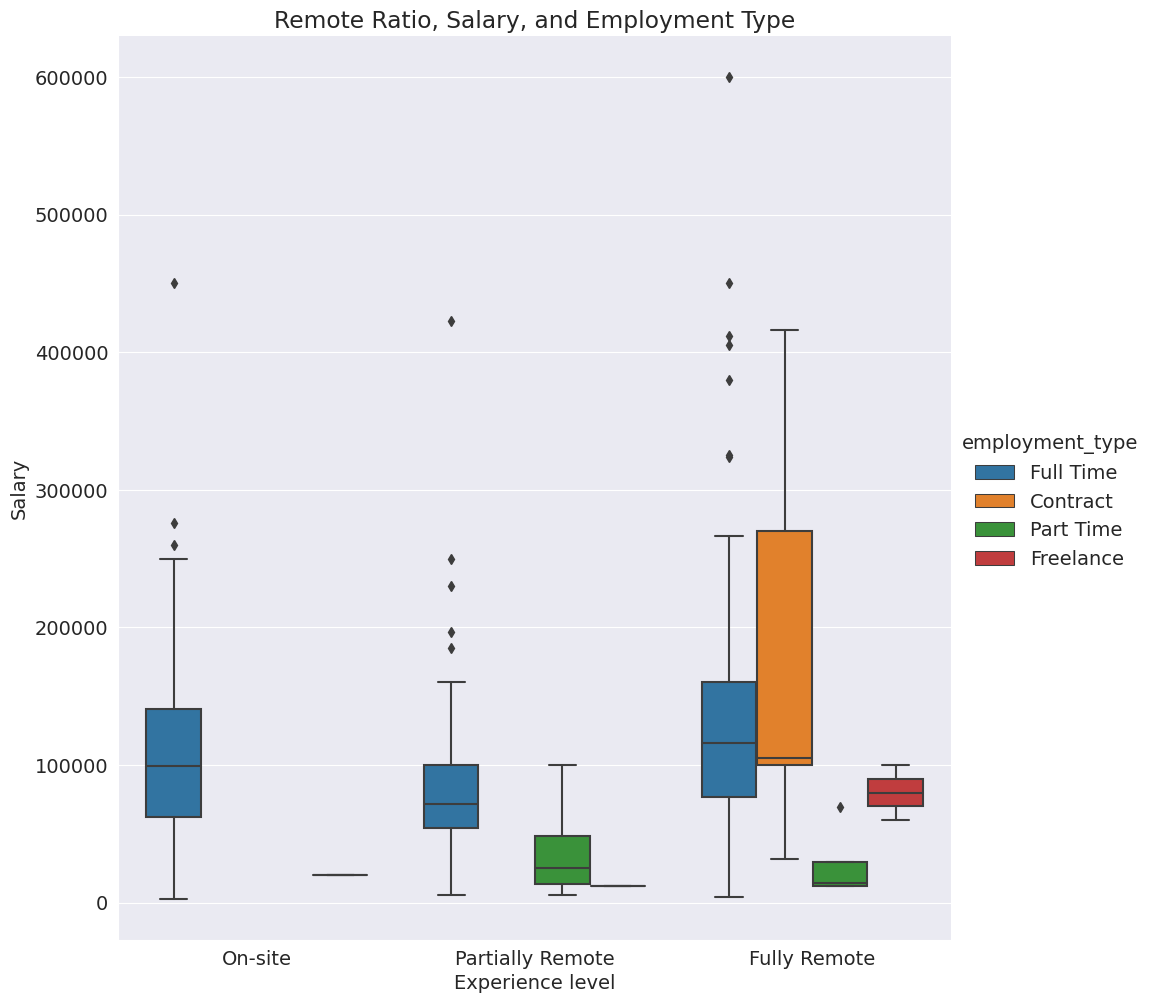

In [113]:
sns.catplot(data=df,
           x='remote_ratio',
           y='salary_in_usd',
           hue='employment_type',
           height=10,
           kind='box')
plt.title('Remote Ratio, Salary, and Employment Type')
plt.ylabel('Salary')
plt.xlabel('Experience level');

*Experience level, Salary, Job title*

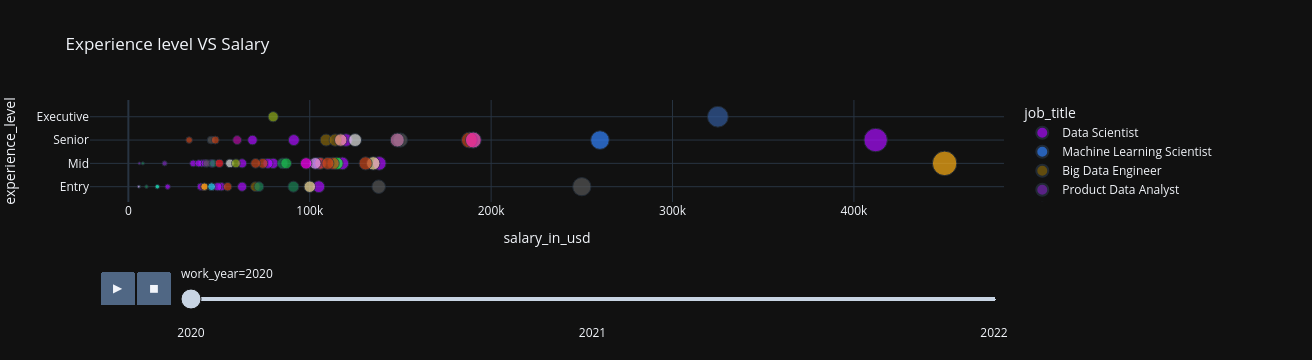

In [115]:
px.scatter(df, x = 'salary_in_usd',
           y = 'experience_level', 
           size = 'salary_in_usd', 
           hover_name = 'job_title', 
           color = 'job_title', 
           color_discrete_sequence=px.colors.qualitative.Alphabet, template = 'plotly_dark',
           animation_frame = 'work_year', title = 'Experience level VS Salary').update_yaxes(categoryarray = ['Entry', 'Mid', 'Senior', 'Executive'])

*Word Cloud of Subject Titles*

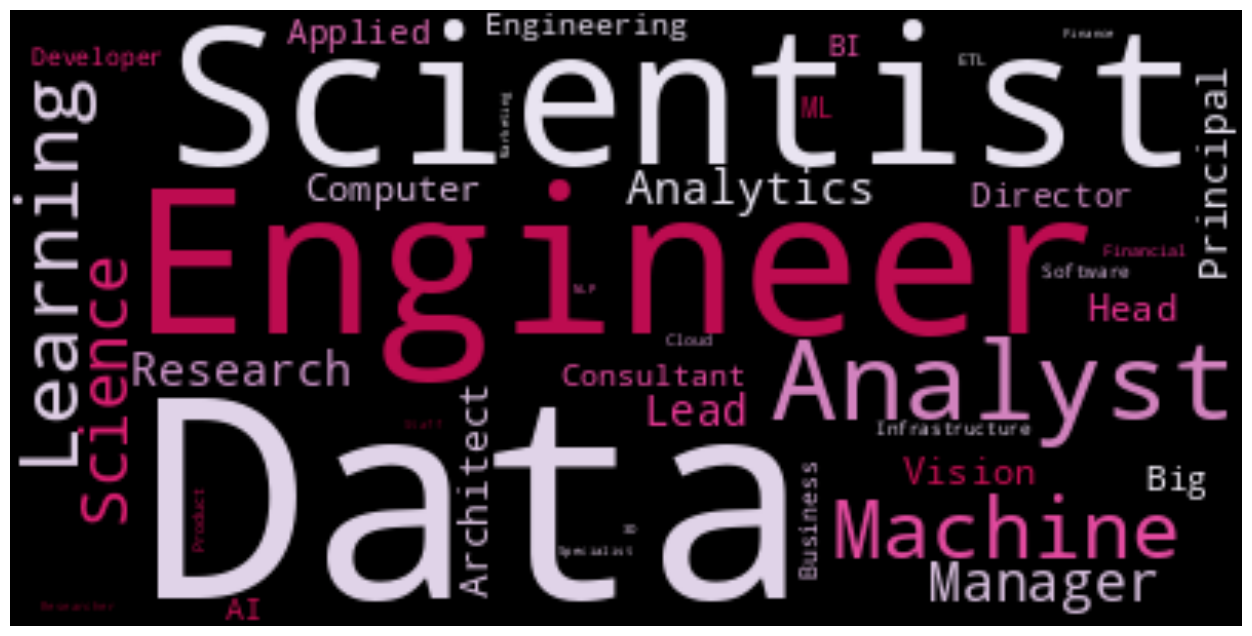

In [116]:
text = " ".join(subject_titles for subject_titles in df["job_title"])
word_cloud = WordCloud(collocations = False, background_color = 'black', colormap = 'PuRd', min_font_size = 2).generate(text)
plt.figure(figsize = (20, 8))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

####  Ask a question and solve it 💡

*Q1. What countries do employees come from?*

In [117]:
five_most_employee_resident=df['employee_residence'].value_counts().head(5)
five_most_employee_resident

employee_residence
United States     332
United Kingdom     44
India              30
Canada             29
Germany            25
Name: count, dtype: int64

*Q2. How many employee working their own country?*

In [118]:
residence_company = df[['employee_residence', 'company_location']]

a = []
for (i, j) in zip(residence_company['employee_residence'], residence_company['company_location']):
    if i == j:
        a.append('Yes')
    else:
        a.append('No')
        
residence_company['work_own_country'] = a
residence_company['work_own_country'].value_counts()

work_own_country
Yes    556
No      51
Name: count, dtype: int64

*🎈 Observations: Most of the employees are working in their own country*

*Q3. How has the average salary of data science jobs change over time?*

In [119]:
avg_sal_change=df.groupby('work_year')['salary_in_usd'].mean()
avg_sal_change

work_year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: salary_in_usd, dtype: float64

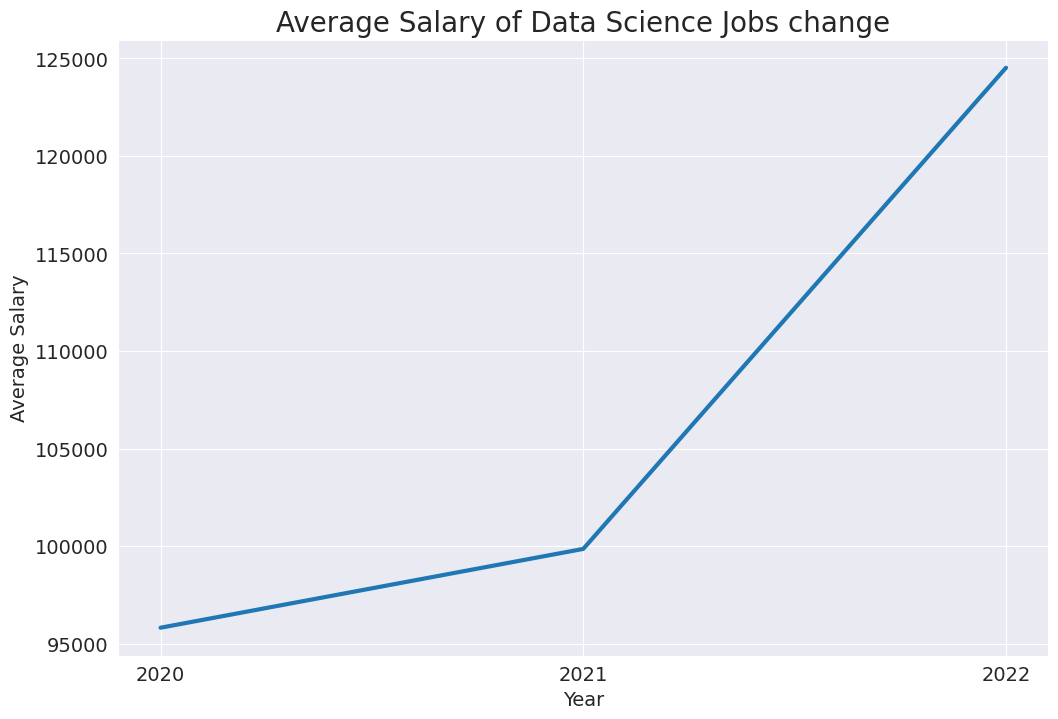

In [120]:
plt.figure(figsize=(12,8))
sns.lineplot(x=avg_sal_change.index,y=avg_sal_change.values,linewidth=3)

xticks=[2020,2021,2022]
plt.xticks(xticks,xticks)
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary of Data Science Jobs change', size=20);

*🎈 Observations: The average salaries increased from approximately USD96000 in 2020 to USD100000 in 2021 and finally USD125000 in 2022. This shows a positive trend and shows that data science jobs are becoming more valuable as the years pass.*

*Q4. If you work full-time, is the salary higher than other types?*

In [121]:
avg_sal_per_emp_type=df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)
avg_sal_per_emp_type

employment_type
Contract     184575.000000
Full Time    113468.073129
Freelance     48000.000000
Part Time     33070.500000
Name: salary_in_usd, dtype: float64

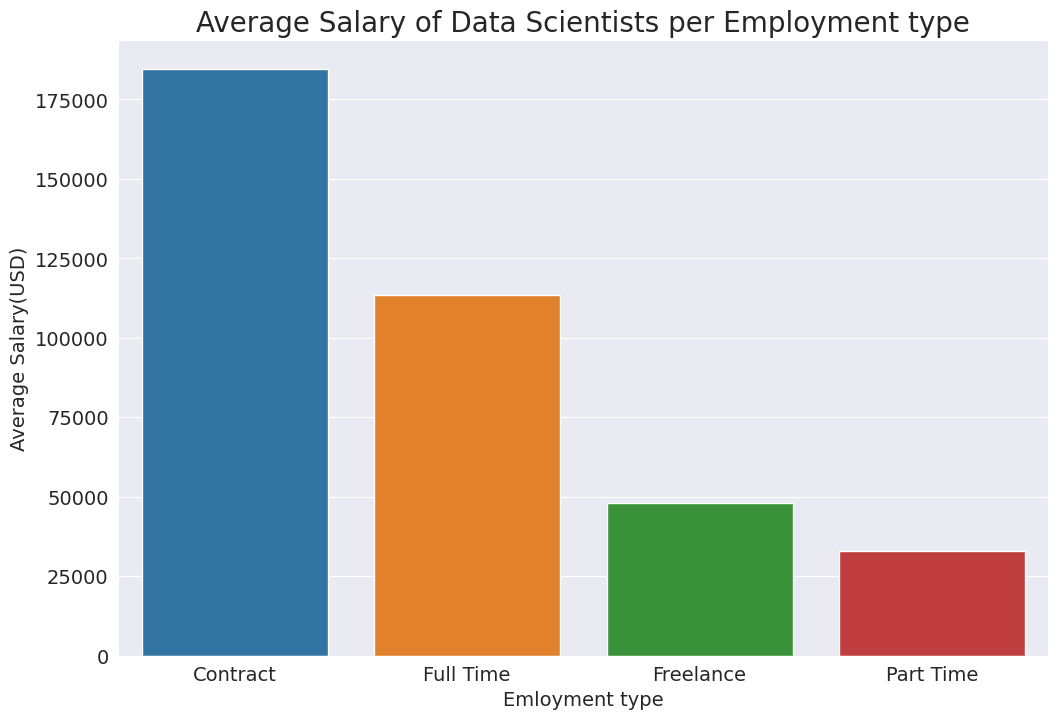

In [122]:
plt.figure(figsize=(12,8))
sns.barplot(x=avg_sal_per_emp_type.index, y=avg_sal_per_emp_type.values)
plt.xlabel('Emloyment type')
plt.ylabel('Average Salary(USD)')
plt.title('Average Salary of Data Scientists per Employment type', size=20);

*🎈 Observations: Though Data science jobs that are full time based have a higher average salary than the ones that are part time or freelance, the data science jobs that are contract based have the highest average salary.*

*Q5. What are the salaries of Data Science jobs based on experience level?*

In [123]:
avg_sal_per_exp=df.groupby('experience_level')['salary_in_usd'].mean()
avg_sal_per_exp

experience_level
Entry         61643.318182
Executive    199392.038462
Mid           87996.056338
Senior       138617.292857
Name: salary_in_usd, dtype: float64

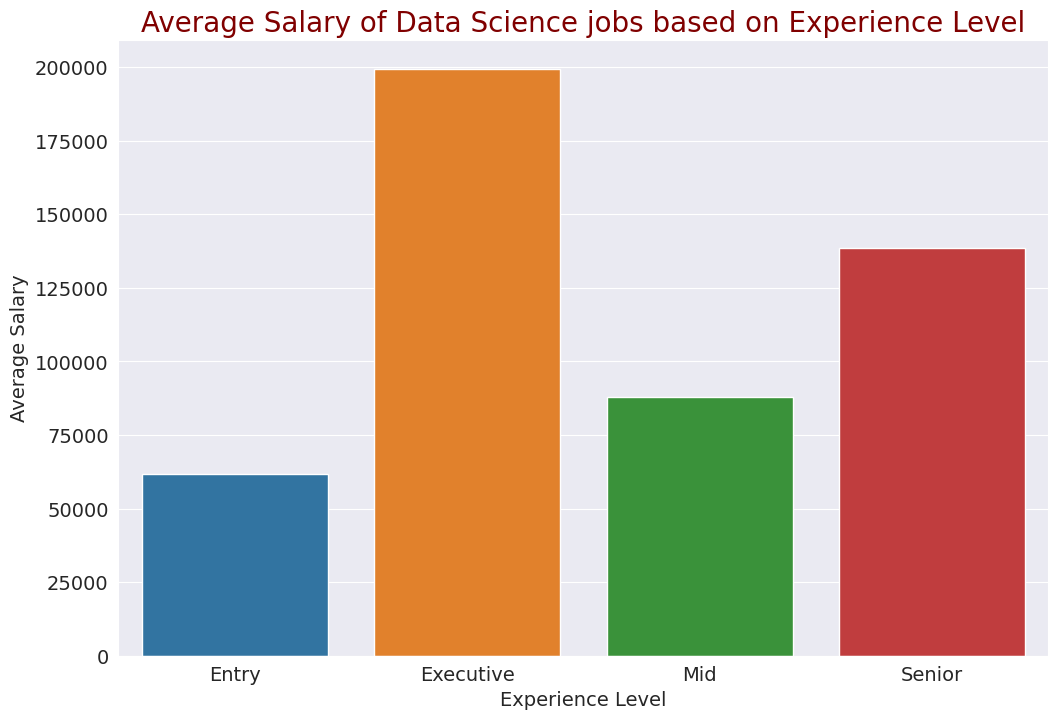

In [126]:
plt.figure(figsize=(12,8))
sns.barplot(x=avg_sal_per_exp.index, y=avg_sal_per_exp.values)
plt.ylabel('Average Salary')
plt.xlabel('Experience Level')
plt.title('Average Salary of Data Science jobs based on Experience Level', size=20, color='maroon');

*Q6: Working in large companies, the salary is higher than other types of companies?*

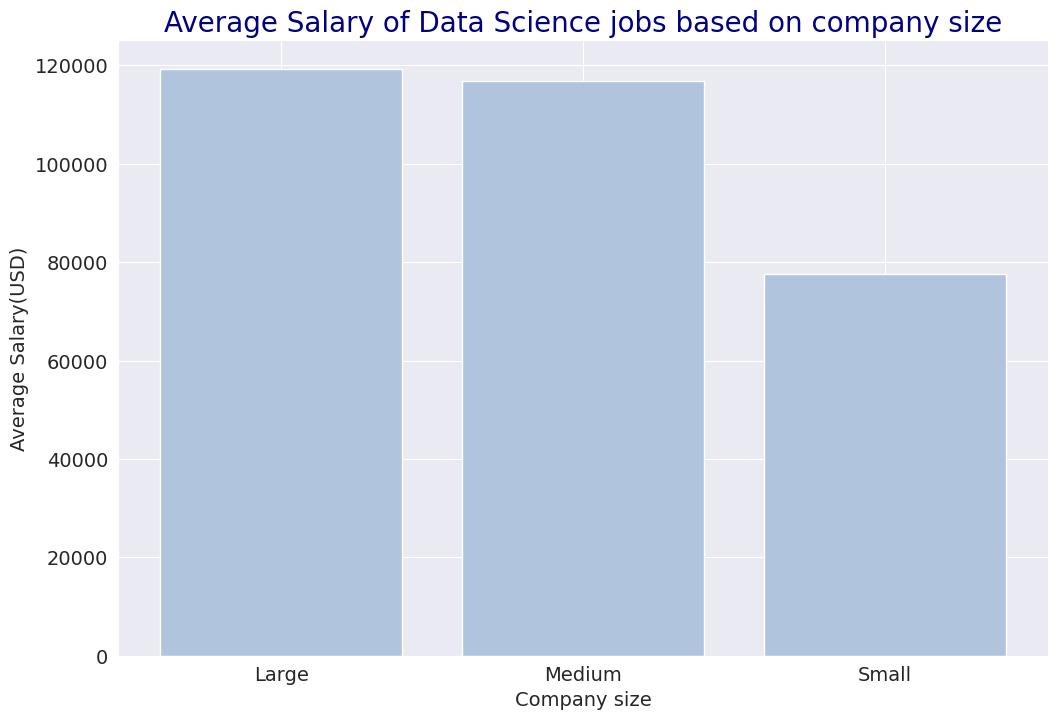

In [131]:
avg_sal_per_comp_size=df.groupby('company_size')['salary_in_usd'].mean()

plt.figure(figsize=(12,8))
plt.bar(avg_sal_per_comp_size.index, avg_sal_per_comp_size.values, color='lightsteelblue')
plt.xlabel('Company size')
plt.ylabel('Average Salary(USD)')
plt.title('Average Salary of Data Science jobs based on company size', size=20, color='navy');

*🎈 Observations: Data science jobs in larger sized company have a higher average salary than medium sized and small companies. This does not necessarily imply that larger companies will always guarantee a higher salary on average. For example, within the company there will be varying levels of expertise and hence differing salary.*

### 8. Conclusion 🎈

<div style="border-radius:10px;
            border :#0A0104 solid;
            padding: 15px;
            background-color:grey;
           font-size:110%;
            text-align: left">
   <span style="color:'black' ;"><center>🗺️ Some interesting things from the above analysis :</center></span>
    

- Data science jobs are getting more popular.

- If an employee wants to get the highest salary possible, United States should be their choice. But of course, this analysis is purely based on the salaries. To give an answer to this, we should also analyze the cost of living, health-care, etc.

- Large and mid-size companies are providing more salaries compared to small ones.
    
- Contract and full-time employments are way to go for 2022.

- Data Engineers, Data Scientists, and Machine Learning Engineers are the most valuable titles (by looking at their average salary).
    
- Remote jobs are more popular and also pay the most. This may be due to the pandemic.

- Salary increase becomes drastic once you have gained a senior-level experience.

- The majority of the data is based in the United States. Since the United States pays much higher wages than other countries, I don't believe these average salaries reflect reality. As a result, I would not base my expectations by looking at these average salaries.

- After conducting this analysis, I believe that pursuing a data science related job is a good career choice in terms of salary and remote options.